# This notebook generates a plot showing the effect of $z$-score normalization

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [36]:
import matplotlib as mpl

dartmouth_colors = ["#00693E", "#12312B", "#C3DD88", "#6EAA8D", "#797979", "#EBF3EF"]

mpl.rcParams.update({
                        'figure.facecolor': "#EBF3EF",
                        'figure.figsize': [7.50, 3.50],
                        'axes.prop_cycle': mpl.cycler(color=dartmouth_colors),
                        'axes.facecolor': "#FFFFFF",
                        'axes.labelcolor': '#12312B',
                        'text.color': '#12312B',
                        'font.family': 'National 2'
                    })


In [41]:
np.random.seed(42)
X_l = np.random.normal(loc=1500, scale=250, size=(100,))
np.random.seed(42)
X_s = np.random.normal(loc=15, scale=2.5, size=(100,))
X_lz = StandardScaler().fit_transform(X_l.reshape(-1, 1))
X_sz = StandardScaler().fit_transform(X_s.reshape(-1, 1))

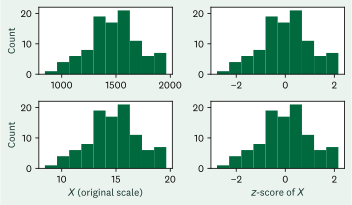

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(5, 3))
ax[0][0].hist(X_l)
ax[0][1].hist(X_lz)
ax[1][0].hist(X_s)
ax[1][1].hist(X_sz)
ax[1][0].set(xlabel='$X$ (original scale)')
ax[1][1].set(xlabel='$z$-score of $X$')
ax[0][0].set(ylabel='Count')
ax[1][0].set(ylabel='Count')
fig.tight_layout()
fig.savefig('zscore_histograms.svg', format='svg')

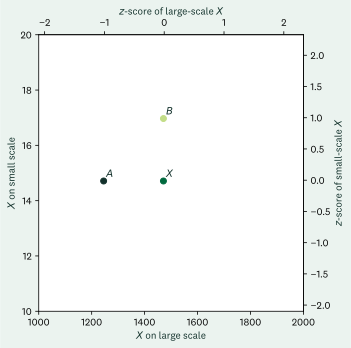

In [130]:
plt.scatter(x=X_l[42], y=X_s[42])
plt.xlim([1000, 2000])
plt.ylim([10, 20])

plt.xlabel('$X$ on large scale')
plt.ylabel('$X$ on small scale')

plt.scatter(x=X_l[42]-X_l.std(), y=X_s[42])
plt.scatter(x=X_l[42], y=X_s[42]+X_s.std())

plt.gcf().set_size_inches(5, 5)

# annotation of the third point
plt.text(X_l[42]-X_l.std()+10,X_s[42]+.15,"$A$")
plt.text(X_l[42]+10,X_s[42]+.15,"$X$")
plt.text(X_l[42]+10,X_s[42]+X_s.std()+.15,"$B$")

plt.gca().secondary_xaxis('top', functions=(lambda x: (x - X_l.mean()) / X_l.std(), lambda x: (x - X_l.mean()) / X_l.std())).set_xlabel('$z$-score of large-scale $X$')
plt.gca().secondary_yaxis('right', functions=(lambda x: (x - X_s.mean()) / X_s.std(), lambda x: (x - X_s.mean()) / X_s.std())).set_ylabel('$z$-score of small-scale $X$')
plt.gcf().tight_layout()
plt.gcf().savefig('zscore_distance.svg', format='svg')

In [122]:
from sklearn.metrics.pairwise import euclidean_distances

d = euclidean_distances(X=[[X_l[42]-X_l.std(), X_s[42]], [X_l[42], X_s[42]+X_s.std()]],
                        Y=[[X_l[42], X_s[42]]])

print(f'The Euclidean distance of point A to point X is {d[0]}.\nThe Euclidean distance of point B to point X is {d[1]}.')

The Euclidean distance of point A to point X is [225.90404416].
The Euclidean distance of point B to point X is [2.25904044].


In [121]:
d = euclidean_distances(X=[[X_lz[42][0]-1, X_sz[42][0]], [X_lz[42][0], X_sz[42][0]+1]],
                        Y=[[X_lz[42][0], X_sz[42][0]]])
print(f'The Euclidean distance of point A to point X is {d[0]}.\nThe Euclidean distance of point B to point X is {d[1]}.')

The Euclidean distance of point A to point X is [1.].
The Euclidean distance of point B to point X is [1.].
